<a href="https://colab.research.google.com/github/FaragoFa/Materia-de-aprendizaje/blob/master/ML7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boston Housing Prices
El dataset contiene 506 observaciones de 14 variables y precios de venta de propiedades en la ciudad de Boston. El objetivo es conocer la influencia de cada variable y elaborar un modelo que prediga precios de venta.

Features:

* crim: Per capita crime rate by town.

* zn: Proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: Proportion of non-retail business acres per town.

* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: Nitrogen oxides concentration (parts per 10 million).

* rm: Average number of rooms per dwelling.

* age: Proportion of owner-occupied units built prior to 1940.

* dis: Weighted mean of distances to five Boston employment centres.

* rad: Index of accessibility to radial highways.

* tax: Full-value property-tax rate per \$10,000.

* ptratio: Pupil-teacher ratio by town.

* black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat: Lower status of the population (percent).

* medv: Median value of owner-occupied homes in \$1000s.

In [160]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Muestro los histogramas de las caracteristicas:

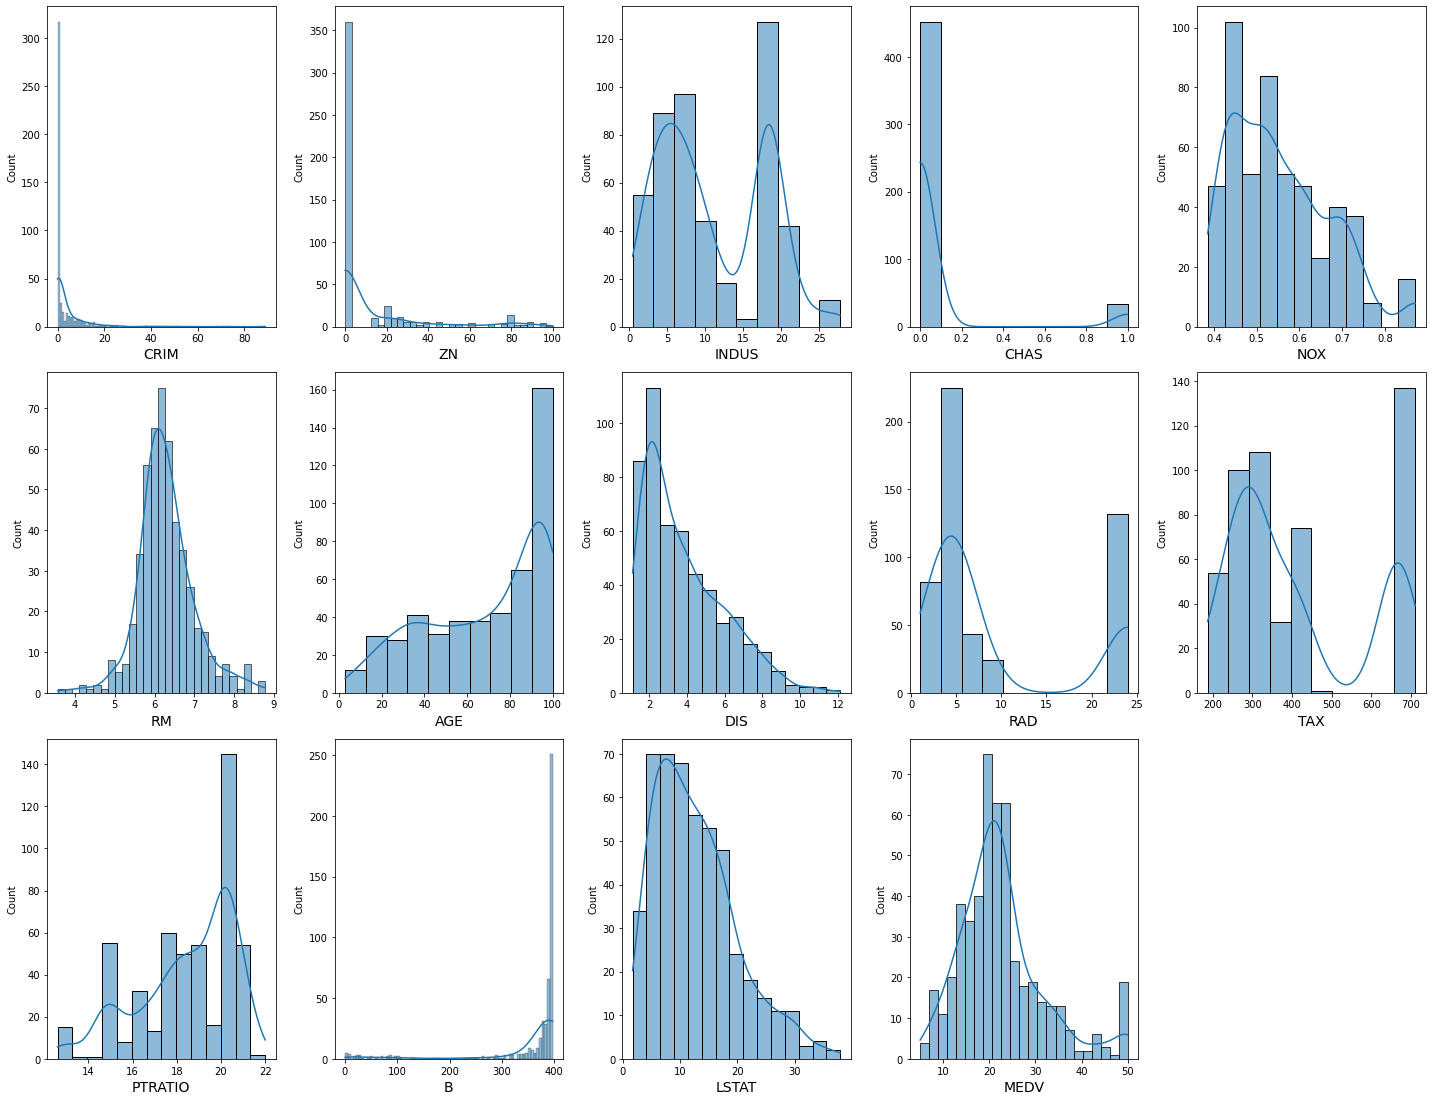

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 20))
i=0

for column in df:  
    i+=1   
    if i <= 14:
        ax = plt.subplot(4, 5, i)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column, fontsize = 14)
       
    
    
plt.tight_layout()
plt.show()

Elimino los datos con caracteristicas vacias (Otra opcion es reemplazarlas por la media)

In [162]:
print ("Datos sin filtrar: ",df.shape)
df_filt = df.dropna()
print ("Datos filtrados (Dataframe inicial): ",df_filt.shape)
#restablecer el índice
df_filt.reset_index(drop=True, inplace=True)
df_filt

Datos sin filtrar:  (506, 14)
Datos filtrados (Dataframe inicial):  (394, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
390,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
391,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
392,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


Veo si hay correlacion entre caracteristicas:

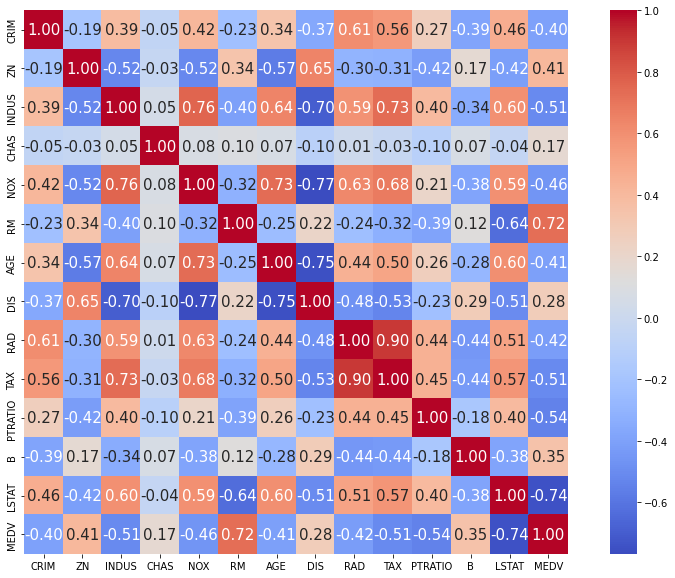

In [163]:
corr = df_filt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Se puede ver que hay correlacion entre TAX y RAD. Por esto se debe eliminar una de ellas:

In [164]:
df_filt.drop(columns = 'RAD', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [168]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
y = df_filt['MEDV'] #Target 
x = df_filt.drop(columns = 'MEDV', axis = 1) #Specs

x = scale(x)   
y = scale(y) 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

Reduccion de dimensionalidad

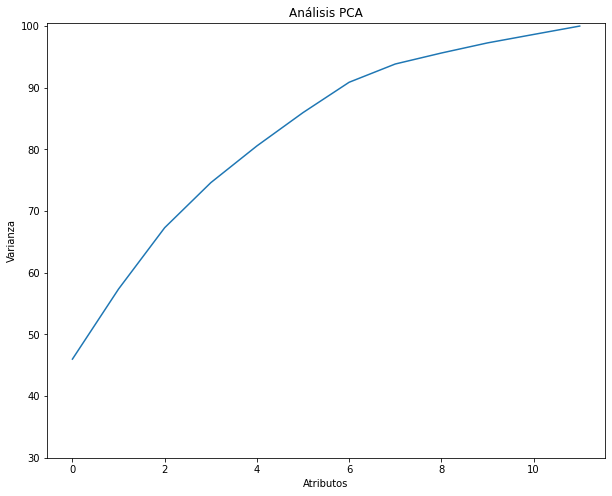

In [169]:
from sklearn.decomposition import PCA
import numpy as np


covar_matrix = PCA(n_components = xtrain.shape[1])
covar_matrix.fit(xtrain)
variance = covar_matrix.explained_variance_ratio_
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=4)*100)

plt.figure(figsize=(10, 8))
plt.ylabel('Varianza')
plt.xlabel('Atributos')
plt.title('Análisis PCA')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

Se puede observar que con 4 atributos se puede representar un 80% de la varianza

Para poder observar el comportamiento en una grafica, voy a reducir a 2 variables (Luego la prediccion la hago con 4):

In [147]:
df_norm = (df_filt-df_filt.min())/(df_filt.max()-df_filt.min())
y = df_norm['MEDV']
x = df_norm.drop(columns = 'MEDV', axis = 1) #Specs
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(x)

pca_pd = pd.DataFrame(data = pca_df, columns = ['Componente_1','Componente_2'])

pca_pd = pd.concat([pca_pd,y],axis =1)
pca_pd


,Componente_1,Componente_2,MEDV
0,0.433832,0.137984,0.422222
1,0.291958,0.135064,0.368889
2,0.419292,0.097452,0.660000
3,0.594607,0.006191,0.631111
4,0.510938,0.034149,0.526667
...,...,...,...
389,-0.099713,0.025963,0.277778
390,-0.108318,0.054657,0.262222
391,-0.015368,0.082025,0.346667
392,-0.036742,0.153390,0.420000


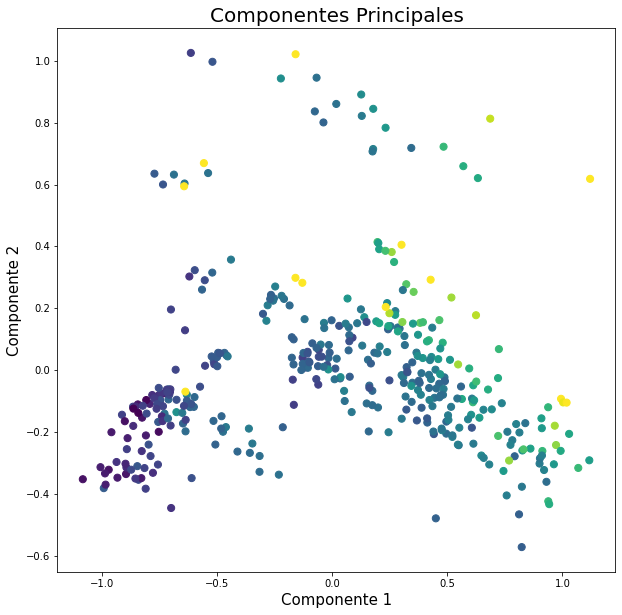

In [148]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_pd.Componente_1, y = pca_pd.Componente_2, c = pca_pd.MEDV, s=50)

Ahora si, hago la prediccion con las 4 variables (que contienen el 80% de la varianza):

In [149]:
pca = PCA(n_components = 4)
pca_df = pca.fit_transform(x)

pca_pd = pd.DataFrame(data = pca_df, columns = ['Componente_1','Componente_2','Componente_3','Componente_4'])

pca_pd = pd.concat([pca_pd,y],axis =1)
pca_pd

,Componente_1,Componente_2,Componente_3,Componente_4,MEDV
0,0.433832,0.137984,-0.037678,0.288913,0.422222
1,0.291958,0.135064,-0.280582,0.070715,0.368889
2,0.419292,0.097452,-0.212372,0.042796,0.660000
3,0.594607,0.006191,-0.225519,-0.081627,0.631111
4,0.510938,0.034149,-0.270868,-0.058815,0.526667
...,...,...,...,...,...
389,-0.099713,0.025963,-0.199344,-0.029531,0.277778
390,-0.108318,0.054657,-0.203072,0.000820,0.262222
391,-0.015368,0.082025,-0.339871,-0.109451,0.346667
392,-0.036742,0.153390,-0.352293,-0.038007,0.420000


Una vez reducida la dimensionalidad del dataset, utilizo RandomForest para predecir el valor de la vivienda

In [150]:
y = pca_pd['MEDV']
x = pca_pd.drop(columns = 'MEDV', axis = 1) #Specs

Separo el dataset en datos para entrenar (80%) y en datos para testear (20%) el modelo

In [151]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

Creo y entreno el modelo

In [152]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()    # Cargar el tipo de modelo a usar
modelo.fit(xtrain, ytrain)          # Entrenar el modelo con los datos preparados

RandomForestRegressor()

Obtengo el score de la red

In [153]:
score1 = modelo.score(xtest, ytest)    
print("Score:", score1)
print()

Score: 0.5282348506641481



Testear

In [154]:
ypred = modelo.predict(xtest)       # Probar el modelo entrenado usando los datos de testeo

Mostrar los resultados en un gráfico comparativo

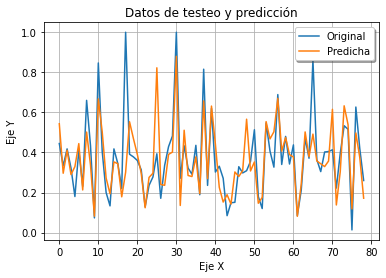

In [155]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="Original")
plt.plot(x_ax, ypred, label="Predicha")
plt.title("Datos de testeo y predicción")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Se puede observar que el modelo predice bien el precio de las viviendas. Ahora, voy a probar entrenar al modelo con regresion lineal para ver la comparativa entre ambos


In [156]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()    # Cargar el tipo de modelo a usar
modelo.fit(xtrain, ytrain)          # Entrenar el modelo con los datos preparados

LinearRegression()

In [157]:
score1 = modelo.score(xtest, ytest)    
print("Score:", score1)
print()

Score: 0.4442289882917707



In [158]:
ypred = modelo.predict(xtest)       # Probar el modelo entrenado usando los datos de testeo

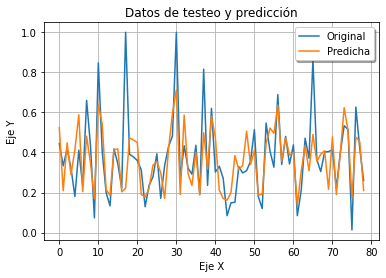

In [159]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="Original")
plt.plot(x_ax, ypred, label="Predicha")
plt.title("Datos de testeo y predicción")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Se puede ver que ambos modelos predicen bien el precio, quiza el Random Forest lo haga un poco mejor